### Useful links
- [CampusX - Handwritten Digit Classification using ANN](https://www.youtube.com/watch?v=3xPT2Pk0Jds)
- [Shubham Singh - The EMNIST dataset letter recognition](https://www.youtube.com/watch?v=3xPT2Pk0Jds)
- [Emnist classification](https://github.com/sejalgupta01/EMNIST-Classification/blob/master/EMNIST_Classification%20(3).ipynb)
- [Deep learning-Deep understanding by shubham singh](https://www.youtube.com/playlist?list=PL2FZtB-DAFqk4iXGu1xK1_fUmTCjtfQhV)
- [Neural Network from Scratch | Mathematics & Python Code](https://www.youtube.com/watch?v=pauPCy_s0Ok)
- https://github.com/khelli07/ai-fnn/blob/main/README.md
- https://khelli07.medium.com/introduction-to-artificial-neural-network-in-deep-learning-aa7ba2280f50
- https://khelli07.medium.com/feedforward-neural-network-fnn-implementation-from-scratch-using-python-467f51ecca3d
- https://towardsdatascience.com/creating-neural-networks-from-scratch-in-python-6f02b5dd911
- https://subscription.packtpub.com/book/data/9781789346640/1/ch01lvl1sec05/feed-forward-propagation-from-scratch-in-python
- [Softmax Layer from Scratch ](https://www.youtube.com/watch?v=AbLvJVwySEo)

### Dependencies

In [791]:
# ! pip install torchvision
# ! pip install tqdm
# ! pip install matplotlib
# ! pip install scikit-learn

In [792]:
# fix random seed
import numpy as np
np.random.seed(0)
np.random.RandomState(0)

# torch random seed
import torch
torch.manual_seed(0)

import torchvision.datasets as ds
import torchvision.transforms as transforms
from tqdm import tqdm

### Dataset

In [793]:
# Download the training and validation datasets
with tqdm(total=1, desc="Loading dataset", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
    train_val_ds = ds.EMNIST(
        root="./data",
        split="letters",
        train=True,
        download=True,
        transform=transforms.ToTensor(),
    )
    pbar.update()

Loading dataset: 100%|██████████ [ time left: 00:00 ]


In [794]:
print(f" train validation dataset lenth: {len(train_val_ds)}")
# print shape
print(f" shape: {train_val_ds.data.shape}")
# print number of classes
print(f" number of classes: {len(train_val_ds.classes)}")
# print classes
print(f" classes: {train_val_ds.classes}")

 train validation dataset lenth: 124800
 shape: torch.Size([124800, 28, 28])
 number of classes: 27
 classes: ['N/A', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [795]:
with tqdm(total=1, desc="Loading dataset", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
    test_ds = ds.EMNIST(
        root="./data",
        split="letters",
        train=False,
        transform=transforms.ToTensor(),
    )
pbar.update()

Loading dataset:   0%|           [ time left: ? ]


In [796]:
print(f"test dataset lenth: {len(test_ds)}")

test dataset lenth: 20800


### Preprocessing

In [797]:
# get labels
labels = np.array(train_val_ds.targets)
# get unique labels
unique_labels = np.unique(labels)

# print number of samples per class
for label in unique_labels:
    print(f"number of samples for class {label}: {np.sum(labels == label)}")

number of samples for class 1: 4800
number of samples for class 2: 4800
number of samples for class 3: 4800
number of samples for class 4: 4800
number of samples for class 5: 4800
number of samples for class 6: 4800
number of samples for class 7: 4800
number of samples for class 8: 4800
number of samples for class 9: 4800
number of samples for class 10: 4800
number of samples for class 11: 4800
number of samples for class 12: 4800
number of samples for class 13: 4800
number of samples for class 14: 4800
number of samples for class 15: 4800
number of samples for class 16: 4800
number of samples for class 17: 4800
number of samples for class 18: 4800
number of samples for class 19: 4800
number of samples for class 20: 4800
number of samples for class 21: 4800
number of samples for class 22: 4800
number of samples for class 23: 4800
number of samples for class 24: 4800
number of samples for class 25: 4800
number of samples for class 26: 4800


In [798]:
# to the same with tensor operations
print(f"number of samples for class 'N/A'(0): {torch.sum(train_val_ds.targets == 0)}")
# if the count is 0, then it can cause problem with one hot encoding

number of samples for class 'N/A'(0): 0


In [799]:
print(train_val_ds.class_to_idx)

{'N/A': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [800]:
# remove 'N/A' label and decrease all labels by 1
train_val_ds.targets = train_val_ds.targets - 1
test_ds.targets = test_ds.targets - 1

train_val_ds.classes = train_val_ds.classes[1:]
test_ds.classes = test_ds.classes[1:]

In [801]:
# print number of samples per class
for label in torch.unique(train_val_ds.targets):
    print(f"number of samples for class {label}: {torch.sum(train_val_ds.targets == label)}")

number of samples for class 0: 4800
number of samples for class 1: 4800
number of samples for class 2: 4800
number of samples for class 3: 4800
number of samples for class 4: 4800
number of samples for class 5: 4800
number of samples for class 6: 4800
number of samples for class 7: 4800
number of samples for class 8: 4800
number of samples for class 9: 4800
number of samples for class 10: 4800
number of samples for class 11: 4800
number of samples for class 12: 4800
number of samples for class 13: 4800
number of samples for class 14: 4800
number of samples for class 15: 4800
number of samples for class 16: 4800
number of samples for class 17: 4800
number of samples for class 18: 4800
number of samples for class 19: 4800
number of samples for class 20: 4800
number of samples for class 21: 4800
number of samples for class 22: 4800
number of samples for class 23: 4800
number of samples for class 24: 4800
number of samples for class 25: 4800


In [802]:
print(train_val_ds.class_to_idx)
print(test_ds.class_to_idx)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}


#### Data Normalization

In [803]:
# next issue: do we need to normalize the data?
%matplotlib inline
import matplotlib.pyplot as plt

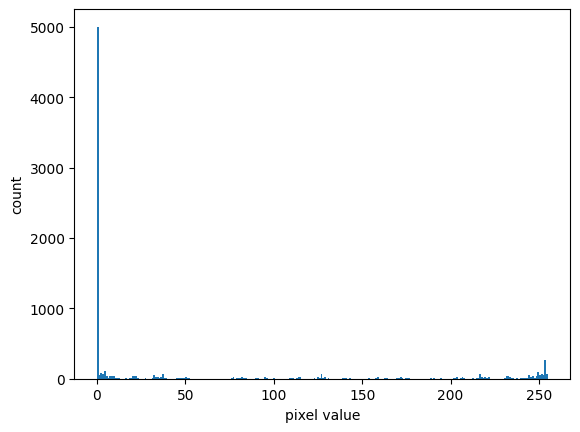

In [804]:
# plot histogram for 1st 10 samples
plt.hist(train_val_ds.data[:10].numpy().ravel(), bins=256)
plt.xlabel("pixel value")
plt.ylabel("count")
plt.show()

In [805]:
# normalize the data
train_val_ds.data = train_val_ds.data / torch.max(train_val_ds.data)
test_ds.data = test_ds.data / torch.max(test_ds.data)

In [806]:
# print min and max values
print(f"min value: {torch.min(train_val_ds.data)}")
print(f"max value: {torch.max(train_val_ds.data)}")

min value: 0.0
max value: 1.0


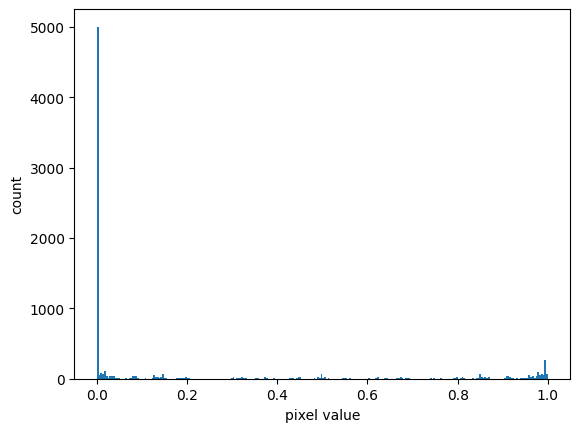

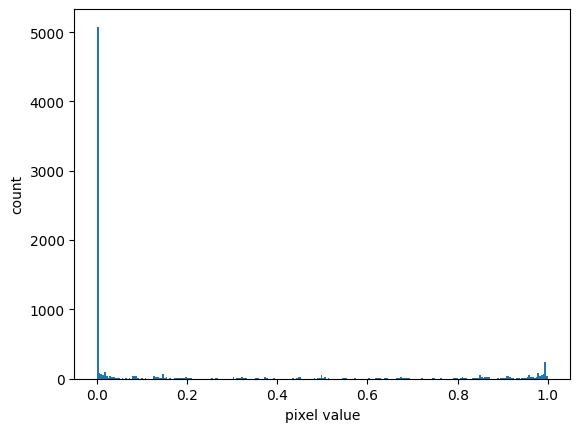

In [807]:
# plot histogram for 1st 10 samples
plt.hist(train_val_ds.data[:10].numpy().ravel(), bins=256)
plt.xlabel("pixel value")
plt.ylabel("count")
plt.show()

# plot for test data
plt.hist(test_ds.data[:10].numpy().ravel(), bins=256)
plt.xlabel("pixel value")
plt.ylabel("count")
plt.show()

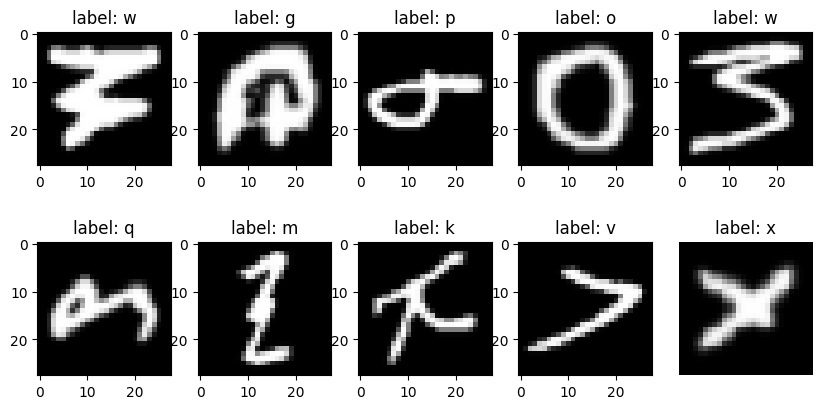

In [808]:
# visualize the data
# plot 1st 10 samples

# create figure
fig, ax = plt.subplots(2, 5, figsize=(10, 5))

# plot 1st 10 samples
for i, ax in enumerate(ax.flatten()):
    ax.imshow(train_val_ds.data[i], cmap="gray")
    # access label as letter
    letter = train_val_ds.classes[train_val_ds.targets[i]]
    ax.set_title(f"label: {letter}")

# remove axis
plt.axis("off")
# show plot
plt.show()

In [809]:
# # one hot encoding the data with scikit-learn
# from sklearn.preprocessing import OneHotEncoder

# # create one hot encoder
# one_hot_encoder = OneHotEncoder()

# # fit one hot encoder
# one_hot_encoder.fit(train_validation_ds.targets.reshape(-1, 1))

# # transform targets
# train_validation_ds.targets = one_hot_encoder.transform(train_validation_ds.targets.reshape(-1, 1)).toarray()

# # transform targets
# test_ds.targets = one_hot_encoder.transform(test_ds.targets.reshape(-1, 1)).toarray()


# # convert to tensor
# train_validation_ds.targets = torch.tensor(train_validation_ds.targets)
# test_ds.targets = torch.tensor(test_ds.targets)

# # print shape
# print(f"train validation targets shape: {train_validation_ds.targets.shape}")

### Train-validation split
The dataset contains 28x28 images of letters from the Latin alphabet. Split the train-validation dataset as 85%-15% to form your train set and validation set. 

In [810]:
# convert torch to numpy
train_val_ds.data = train_val_ds.data.numpy()
train_val_ds.targets = train_val_ds.targets.numpy()

# convert torch to numpy
test_ds.data = test_ds.data.numpy()
test_ds.targets = test_ds.targets.numpy()

In [811]:
# use sklearn to split train_validation_dataset into train and validation datasets
from sklearn.model_selection import train_test_split

val_per = 0.15 # validation percentage

# split train_validation_dataset into train and validation datasets as 85% and 15% respectively
train_ds, val_ds, train_labels, val_labels = train_test_split(
    train_val_ds.data,
    train_val_ds.targets,
    test_size=val_per,
    random_state=1,
)

In [812]:
print(f"train dataset length: {len(train_ds)}")
print(f"validation dataset length: {len(val_ds)}")

train dataset length: 106080
validation dataset length: 18720


In [813]:
# print data type
print(f"train_ds shape: {train_ds.shape}")
print(f"train_ds type: {type(train_ds)}")
print(f"cell data type: {train_ds.dtype}")

# print label
print(f"\ntrain_labels shape: {train_labels.shape}")
print(f"train_labels type: {type(train_labels)}")
print(f"cell data type: {train_labels.dtype}")

n = 2
# print 1st 5 data
print(f"\ntrain_ds 1st 10 data: {train_ds[:n]}")
# print 1st 5 labels
print(f"train_labels 1st 10 data: {train_labels[:n]}")

train_ds shape: (106080, 28, 28)
train_ds type: <class 'numpy.ndarray'>
cell data type: float32

train_labels shape: (106080,)
train_labels type: <class 'numpy.ndarray'>
cell data type: int64

train_ds 1st 10 data: [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
train_labels 1st 10 data: [17  1]


In [814]:
# print 1st 10 labels
print(f"train labels: {train_labels[:10]}")

train labels: [17  1 14 19 21  2 11  9 19 23]


In [815]:
# print 1st 10 validation labels
print(f"validation labels: {val_labels[:10]}")

validation labels: [12 10 11  8 25 19 18  4 13 15]


### FFN implementation

##### Loss function
As you can see, our example model is currently random. To remedy this, we need a way to
calculate how wrong the neural network is at current predictions and begin adjusting weights
and biases to decrease error over time. Thus, our next step is to quantify how wrong the model is
through what’s defined as a loss function.

In [816]:
# no matter which loss function we’ll use, the overall loss is always a mean value of all sample losses
# common loss functions
class Loss:
    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        # Calculate mean loss
        data_loss = np.mean(sample_losses)
        # Return loss
        return data_loss

##### Activation function

In [817]:
class Activation:
    def forward(inputs):
        raise NotImplementedError
    @staticmethod
    def backward(grad_outputs, inputs):
        raise NotImplementedError
    

In [818]:
# ReLU activation
class ReLU(Activation):
    # Forward pass
    @staticmethod
    def forward(inputs):
        return np.maximum(0, inputs, dtype=np.float64)
    
    # derivative of relu
    @staticmethod
    def backward(grad_outputs, inputs):
        # Since we need to modify original variable,
        # let’s make a copy of values first
        grad_inputs = grad_outputs.copy()

        # Zero gradient where input values were negative
        grad_inputs[inputs <= 0] = 0

        return grad_inputs

In [819]:
class Softmax(Activation):
    # Forward pass
    @staticmethod
    def forward(inputs):
        # get row max to subtract from each row
        # this is to prevent overflow
        # the max value in each row will be 0
        # the output will be extactly the same
        row_maxs = np.max(inputs, axis=1, keepdims=True)

        # Get unnormalized probabilities
        # exponentiate values
        exp_values = np.exp(inputs - row_maxs)

        # Get normalization bases for each sample
        norm_bases = np.sum(exp_values, axis=1, keepdims=True)

        # Normalize them for each sample
        probabilities = exp_values / norm_bases

        #print(f"softmax forward output shape: {probabilities.shape}")

        return probabilities
    

    # back propagation
    @staticmethod
    def backward(grad_output, inputs):
        # # Create uninitialized array
        # input_grads = np.empty_like(grad_output)

        # # Enumerate outputs and gradients
        # outputs = Softmax.forward(inputs)
        # # Loop over the samples
        # for idx, (output_grad, output) in enumerate(zip(grad_output, outputs)):
        #     # Flatten output array
        #     single_output = output.reshape(-1, 1)

        #     # Calculate Jacobian matrix of the output
        #     jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)

        #     # Calculate sample-wise gradient
        #     # and add it to the array of sample gradients
        #     input_grads[idx] = np.dot(jacobian_matrix, output_grad)

        # return input_grads
        outputs = Softmax.forward(inputs)
        grad_input = outputs * (grad_output - np.sum(outputs * grad_output, axis=-1, keepdims=True))
        return grad_input

In [820]:
#test softmax
softmax = Softmax()

# Forward pass
x = np.array([[1.0, 2.0, 3.0]])
y = softmax.forward(x)
print(f"softmax output: {y}")

# Backward pass
# Example gradient from the next layer
grad_output = np.array([[0.1, 0.2, 0.3]])
# Calculate gradient
grad_input = softmax.backward(grad_output, x)
print(f"softmax gradient: {grad_input}")

softmax output: [[0.09003057 0.24472847 0.66524096]]
softmax gradient: [[-0.01418171 -0.01407704  0.02825875]]


##### Dense layer

In [821]:
# Dense or fully connected layer
class DenseLayer:
    # Here, we’re setting weights to be random and biases to be 0
    def __init__(self, 
                 n_inputs:int, 
                 n_neurons:int, 
                 activation:Activation,
                 learning_rate:float = 0.001,
                 debug:bool = False,
                 ) -> None:
        # random initialization of weights
        # n_inputs x n_neurons matrix
        self.weights = np.random.randn(n_inputs, n_neurons)

        # print max and min weights
        if debug:
            print(f"weights shape: {self.weights.shape}")
            print(f"weight (min, max) = ({np.min(self.weights)}, {np.max(self.weights)})")
           
        # random initialization of biases
        self.biases = np.random.randn(1, n_neurons) # 1 row and n_neurons zeros

        if debug:
            print(f"baises shape: {self.biases.shape}")
            print(f"bias (min, max) = ({np.min(self.biases)}, {np.max(self.biases)})")
            

        # activation function
        self.activation = activation
        # learning rate
        self.learning_rate = learning_rate

    # Forward pass
    # When we pass data through a model from beginning to end, this is called a forward pass. 
    def forward(self, inputs:np.ndarray):
        # check input shape
        if len(inputs.shape) != 2:
            raise ValueError(f"input shape must be 2D, got {len(inputs.shape)}D")
        self.inputs = inputs

        # inputs shape: (batch_size, n_inputs)
        # weights shape: (n_inputs, n_neurons)
        # biases shape: (1, n_neurons)
        # output shape: (batch_size, n_neurons) i.e for each sample, we get n_neurons outputs
        out =  np.dot(self.inputs, self.weights) + self.biases
        self.activation_inputs = out
        out = self.activation.forward(out)
        return out
    
    def backward(self, grad_output:np.ndarray):
        # activation function derivative
        grad_output = self.activation.backward(grad_output, self.activation_inputs)

        # Gradients on parameters
        # dE/dW = dE/dY * dY/dW = dE/dY * X.T
        self.grad_weights = np.dot(self.inputs.T, grad_output)

        # dE/dB = dE/dY * dY/dB = dE/dY * 1
        self.grad_biases = np.sum(grad_output, axis=0, keepdims=True)

        # Gradient on values
        # dE/dX = dE/dY * dY/dX = W.T * dE/dY
        self.grad_inputs = np.dot(grad_output, self.weights.T)

    
        # update parameters
        # vanilla gradient descent optimization
        self.weights -= self.learning_rate * self.grad_weights 
        self.biases -= self.learning_rate * self.grad_biases

        return self.grad_inputs
    

In [822]:
inputs = [
    [1, 2],
    [3, 4],
    [5, 6]
]

dense1 = DenseLayer(2, 4, ReLU(), debug=True)
dense1.forward(np.array(inputs))

weights shape: (2, 4)
weight (min, max) = (-0.977277879876411, 2.240893199201458)
baises shape: (1, 4)
bias (min, max) = (-0.10321885179355784, 1.454273506962975)


array([[ 5.39594947,  0.        ,  3.02295839,  3.39245229],
       [12.65917015,  0.        ,  6.88061119,  7.57152427],
       [19.92239082,  0.        , 10.738264  , 11.75059625]])

In [823]:
inputs = [
    [1, 2],
    [3, 4],
    [5, 6]
]

dense1 = DenseLayer(2, 4, Softmax())
dense1.forward(np.array(inputs))

array([[2.80571725e-01, 1.22192837e-01, 5.87019581e-01, 1.02158575e-02],
       [9.01926081e-01, 3.65502709e-03, 9.42913652e-02, 1.27526374e-04],
       [9.94765407e-01, 3.75109565e-05, 5.19653606e-03, 5.46195203e-07]])

#### Categorical cross entropy derivative

In [824]:
class CategoricalCrossEntropyLoss(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values-only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        
        return negative_log_likelihoods
    
    def backward(self, output_grads, y_true):
        # Number of samples
        samples = len(output_grads)

        # Number of labels in every sample
        # We’ll use the first sample to count them
        labels = len(output_grads[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        epsilon = 1e-7

        # Calculate gradient
        self.dinputs = -y_true / (output_grads+epsilon)
        # Normalize gradient
        self.dinputs = self.dinputs / samples

        return self.dinputs

#### Emnist model

In [825]:
class EmnistModel:
    def __init__(
            self, 
            input_size: int = 784, # 28 * 28
            output_size: int = 26, # 26 letters
            hidden_layers_size: list=[64, 64],
            hidden_layers_activation:Activation = ReLU(),
            output_layer_activation:Activation = Softmax(),
            loss:Loss = CategoricalCrossEntropyLoss(),
            learning_rate:float = 0.001,
            ) -> None:
        
        # initialize layers
        self.layers = []

        # create hidden layers
        for i, hidden_layer_size in enumerate(hidden_layers_size):
            # if it is the 1st hidden layer
            if i == 0:
                # input size is the input size of the model
                input_size = input_size
            else:
                # input size is the output size of the previous layer
                input_size = hidden_layers_size[i-1]
            
            # create hidden layer
            self.layers.append(
                DenseLayer(
                    input_size,
                    hidden_layer_size,
                    hidden_layers_activation,
                    learning_rate=learning_rate,
                    debug=True
                )
            )

        # create output layer
        self.layers.append(
            DenseLayer(
                hidden_layers_size[-1],
                output_size,
                output_layer_activation,
                learning_rate=learning_rate,
                debug=True
            )
        )

        # set loss and learning rate
        self.loss = loss
        self.learning_rate = learning_rate

    def model_summary(self):
        # print model summary
        print(f"Model summary")
        print(f"==============")
        print(f"Input size: {self.layers[0].weights.shape[0]}")
        for i, layer in enumerate(self.layers):
            print(f"Layer {i+1} (input, output) size: {layer.weights.shape}")
        print(f"Output size: {self.layers[-1].weights.shape[1]}")
        print(f"Loss: {self.loss.__class__.__name__}")
        print(f"Learning rate: {self.learning_rate}\n")

    def forward(self, inputs):
        # forward pass
        for layer in self.layers:
            inputs = layer.forward(inputs)
        return inputs
    
    def backward(self, grads_output):
        # backward pass
        for layer in reversed(self.layers):
            grads_output = layer.backward(grads_output)
        return grads_output
    
    def shuffle_data(self, X:np.ndarray, y:np.ndarray):
        # X and y has different shape
        # so we need to shuffle them together
        # create random index
        random_index = np.random.permutation(len(X))
        # shuffle X and y
        return X[random_index], y[random_index]
    
    def evaluate(self, X, y):
        # forward pass
        output = self.forward(X)
        # calculate loss
        loss = self.loss.calculate(output, y)
        # get predictions and calculate accuracy
        predictions = np.argmax(output, axis=1)
        accuracy = np.mean(predictions == y)
        return loss, accuracy
    
    
    def train(self, X, y, epochs, batch_size, validation_data):
        # initialize progress bar
        with tqdm(total=epochs, desc="Training", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:

            # shuffle data
            X, y = self.shuffle_data(X, y)
            # train loop
            for epoch in range(epochs):
        

                # initialize loss and accuracy
                epoch_loss = 0
                epoch_accuracy = 0

                steps = X.shape[0] // batch_size
                if X.shape[0] % batch_size != 0:
                    steps += 1


                # iterate over batches
                for batch in range(steps):
                    # get batch
                    X_batch = X[batch * batch_size: (batch + 1) * batch_size]
                    y_batch = y[batch * batch_size: (batch + 1) * batch_size]

                    # forward pass, calculate loss and accuracy
                    # then backward pass, update parameters
                    
                    output = self.forward(X_batch)

                    # calculate loss
                    loss = self.loss.calculate(output, y_batch)

                    # get predictions and calculate accuracy
                    predictions = np.argmax(output, axis=1)
                    accuracy = np.mean(predictions == y_batch)

                    # update loss and accuracy
                    epoch_loss += loss
                    epoch_accuracy += accuracy

                    # backward pass
                    # print(output)
                    grad_loss = self.loss.backward(output, y_batch)
                    #print(f"grad loss shape: {grad_loss.shape}")
                    self.backward(grad_loss)

                
                print(f"epoch: {epoch+1}/{epochs}, loss: {epoch_loss / steps}, accuracy: {epoch_accuracy / steps}")

                # update progress bar
                # pbar.set_postfix(
                #     loss=epoch_loss / (len(X) // batch_size),
                #     accuracy=epoch_accuracy / (len(X) // batch_size),
                #     val_loss=self.evaluate(validation_data[0], validation_data[1])[0],
                #     val_accuracy=self.evaluate(validation_data[0], validation_data[1])[1],
                # )
                pbar.update()

### Training

##### Building the model

In [826]:
print(train_ds.shape)
input_shape = train_ds.shape[1:]
input_size = np.prod(input_shape)
print(f"input shape: {input_shape}")
print(f"input size: {input_size}")

(106080, 28, 28)
input shape: (28, 28)
input size: 784


In [827]:
output_size = len(np.unique(train_labels))
print(f"output size: {output_size}")

output size: 26


In [828]:
# flatten train_ds and val_ds
train_ds = train_ds.reshape(train_ds.shape[0], -1)
val_ds = val_ds.reshape(val_ds.shape[0], -1)

print(train_ds.shape)

(106080, 784)


In [843]:
model = EmnistModel(
    input_size=input_size,
    output_size=output_size,
    hidden_layers_size=[1024],
    learning_rate=0.005,
)

model.model_summary()

weights shape: (784, 1024)
weight (min, max) = (-4.8460482186723945, 4.343344013632865)
baises shape: (1, 1024)
bias (min, max) = (-3.70111653217779, 3.5165598651944623)
weights shape: (1024, 26)
weight (min, max) = (-4.4610248423773, 3.7946705875652245)
baises shape: (1, 26)
bias (min, max) = (-1.959964765362146, 2.5513701089806538)
Model summary
Input size: 784
Layer 1 (input, output) size: (784, 1024)
Layer 2 (input, output) size: (1024, 26)
Output size: 26
Loss: CategoricalCrossEntropyLoss
Learning rate: 0.005



##### Runnig the model

In [844]:
model.train(
    X=train_ds,
    y=train_labels,
    epochs=5,
    batch_size=32,
    validation_data=(val_ds, val_labels)
)

Training:  20%|██         [ time left: 06:16 ]

epoch: 1/5, loss: 14.711553962614595, accuracy: 0.08480392156862746


Training:  40%|████       [ time left: 05:01 ]

epoch: 2/5, loss: 13.756665011128137, accuracy: 0.1442024886877828


Training:  60%|██████     [ time left: 03:29 ]

epoch: 3/5, loss: 13.315365886265576, accuracy: 0.17148378582202112


### Testing